<a href="https://colab.research.google.com/github/ayaamr11/CustomerSegmentation-clustering/blob/main/CustomerSegmentation_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About Dataset



This case requires to develop a customer segmentation to define marketing strategy. The
sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the Data Dictionary for Credit Card dataset :-

* **CUSTID** : Identification of Credit Card holder (Categorical)

* **BALANCE** : Balance amount left in their account to make purchases (
* **BALANCEFREQUENCY** : How frequently the Balance is updated, score between 0  and 1 (1 = frequently updated, 0 = not frequently updated)
* **PURCHASES** : Amount of purchases made from account
* **ONEOFFPURCHASES** : Maximum purchase amount done in one-go
* **INSTALLMENTSPURCHASES** : Amount of purchase done in installment
* **CASHADVANCE** : Cash in advance given by the user
* **PURCHASESFREQUENCY** : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
* **ONEOFFPURCHASESFREQUENCY** : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
* **PURCHASESINSTALLMENTSFREQUENCY** : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
* **CASHADVANCEFREQUENCY** : How frequently the cash in advance being paid
* **CASHADVANCETRX** : Number of Transactions made with "Cash in Advanced"
* **PURCHASESTRX** : Numbe of purchase transactions made
* **CREDITLIMIT** : Limit of Credit Card for user
* **PAYMENTS** : Amount of Payment done by user
* **MINIMUM_PAYMENTS** : Minimum amount of payments made by user
* **PRCFULLPAYMENT** : Percent of full payment paid by user
* **TENURE** : Tenure of credit card service for user

# Imports

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

# Read dataset

In [8]:
df=pd.read_csv('CC GENERAL.csv')

# Exploring data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

- Check null values in each column.

In [9]:
round(df.isnull().sum(axis=0)*100/df.shape[0],2)

CUST_ID                             0.00
BALANCE                             0.00
BALANCE_FREQUENCY                   0.00
PURCHASES                           0.00
ONEOFF_PURCHASES                    0.00
INSTALLMENTS_PURCHASES              0.00
CASH_ADVANCE                        0.00
PURCHASES_FREQUENCY                 0.00
ONEOFF_PURCHASES_FREQUENCY          0.00
PURCHASES_INSTALLMENTS_FREQUENCY    0.00
CASH_ADVANCE_FREQUENCY              0.00
CASH_ADVANCE_TRX                    0.00
PURCHASES_TRX                       0.00
CREDIT_LIMIT                        0.01
PAYMENTS                            0.00
MINIMUM_PAYMENTS                    3.50
PRC_FULL_PAYMENT                    0.00
TENURE                              0.00
dtype: float64

- Check duplicate rows

In [ ]:
df.duplicated().sum()

- Basic statistics for numerical columns.

In [7]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


- outliers


- distribution for each column (skewness)

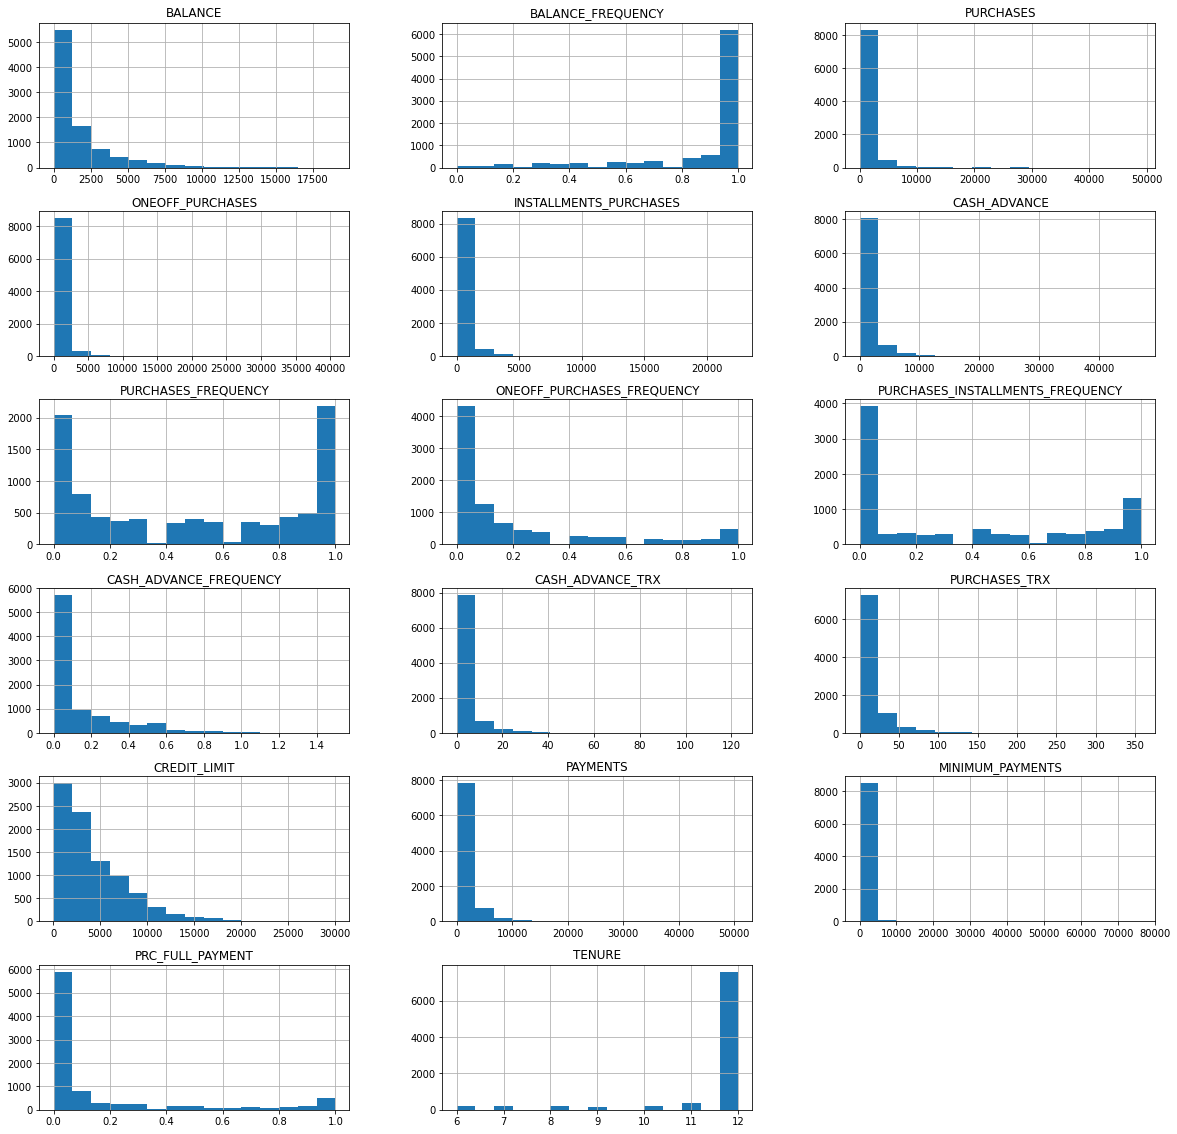

In [10]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='object']

df[numerical_features].hist(bins=15, figsize=(20, 20), layout=(6, 3));

##preprocessing data 

In [ ]:
#remove nulls
df.dropna(axis=0,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8636 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8636 non-null   object 
 1   BALANCE                           8636 non-null   float64
 2   BALANCE_FREQUENCY                 8636 non-null   float64
 3   PURCHASES                         8636 non-null   float64
 4   ONEOFF_PURCHASES                  8636 non-null   float64
 5   INSTALLMENTS_PURCHASES            8636 non-null   float64
 6   CASH_ADVANCE                      8636 non-null   float64
 7   PURCHASES_FREQUENCY               8636 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 11  CASH_ADVANCE_TRX                  8636 non-null   int64  
 12  PURCHA

In [ ]:
#remove unnecessary columns
len(np.unique(df['CUST_ID']))

8636

In [ ]:
df.drop(['CUST_ID'],axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8636 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8636 non-null   float64
 1   BALANCE_FREQUENCY                 8636 non-null   float64
 2   PURCHASES                         8636 non-null   float64
 3   ONEOFF_PURCHASES                  8636 non-null   float64
 4   INSTALLMENTS_PURCHASES            8636 non-null   float64
 5   CASH_ADVANCE                      8636 non-null   float64
 6   PURCHASES_FREQUENCY               8636 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 10  CASH_ADVANCE_TRX                  8636 non-null   int64  
 11  PURCHASES_TRX                     8636 non-null   int64  
 12  CREDIT

In [ ]:
#normalize data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

In [ ]:
data_scaled.shape

(8636, 17)

##PCA and feature engineering

In [ ]:
pca = PCA()
pca.fit(data_scaled)
#pca.explained_variance_ratio_
pca.explained_variance_ratio_.cumsum()

array([0.27231177, 0.47605485, 0.56523818, 0.64097427, 0.70374045,
       0.76086831, 0.81003019, 0.85213753, 0.8889545 , 0.91976958,
       0.94340762, 0.96115301, 0.97542011, 0.98720671, 0.99728768,
       0.99999931, 1.        ])

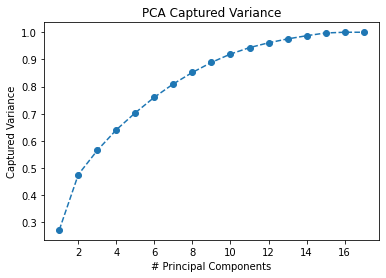

In [ ]:
plt.plot(range(1, 18), pca.explained_variance_ratio_.cumsum() , marker='o', linestyle='--')
plt.title('PCA Captured Variance')
plt.xlabel('# Principal Components')
plt.ylabel('Captured Variance')
plt.show()

In [ ]:
pca = PCA(n_components=9)
transformed_data = pca.fit_transform(data_scaled)

In [ ]:
type(pca)

sklearn.decomposition._pca.PCA

In [ ]:
transformed_data.shape

(8636, 9)

#clustering 

##K-means

In [ ]:
distortions = []
K = range(1,16)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(transformed_data)
    distortions.append(kmeanModel.inertia_)

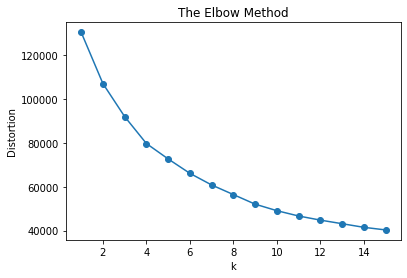

In [ ]:
plt.plot(K, distortions, marker = 'o')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method')
plt.show()

In [ ]:
kmeans= KMeans(4)

In [ ]:
kmeans.fit(transformed_data)

KMeans(n_clusters=4)

In [ ]:
kmeans.labels_

array([2, 1, 0, ..., 0, 2, 2], dtype=int32)

In [ ]:
np.unique(kmeans.labels_)

array([0, 1, 2, 3], dtype=int32)

##Hierarchical Clustering

In [ ]:
transformed_data[:,0:2].shape

(8636, 2)

In [ ]:
#import scipy.cluster.hierarchy as shc

#plt.title("Counters Dendograms")
#end = shc.dendrogram(shc.linkage(transformed_data , method='centroid',metric='euclidean'),orientation='top')
# Dendogram for Heirarchical Clustering



In [ ]:
ag = AgglomerativeClustering(4)
ag.fit(transformed_data)

AgglomerativeClustering(n_clusters=4)

In [ ]:
 ag.labels_

array([0, 0, 2, ..., 0, 0, 0])

In [ ]:
np.unique(ag.labels_)

array([0, 1, 2, 3])

In [ ]:
print(silhouette_score(transformed_data, ag.labels_))

0.1661257045202557


In [ ]:
scores = []
ks=[ x for x in range(3,13)] 
K = range(3,13)
for k in K:
    agmodel = AgglomerativeClustering(n_clusters=k)
    agmodel.fit(transformed_data)
    scores.append(silhouette_score(transformed_data, agmodel.labels_))

In [ ]:
print(scores)

[0.14491501934215772, 0.1661257045202557, 0.17492480758835577, 0.19919999259159976, 0.20313848859050923, 0.20591773951354023, 0.19912060945025423, 0.16675564344638674, 0.16914657739950723, 0.16274388935120015]


In [ ]:
print(max(scores))
print(ks[scores.index(max(scores))])

0.20591773951354023
8


In [ ]:
ag8 = AgglomerativeClustering(8)
ag8.fit(transformed_data)

AgglomerativeClustering(n_clusters=8)

##DBSCAN

####trials

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=4)
dbscan.fit(transformed_data)

DBSCAN(min_samples=4)

In [ ]:
dbscan.labels_

array([ 0, -1,  0, ..., -1, -1, -1])

In [ ]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
       50, 51, 52, 53, 54, 55, 56, 57])

In [ ]:
dbscan = DBSCAN(eps=2, min_samples=4)
dbscan.fit(transformed_data)

DBSCAN(eps=2, min_samples=4)

In [ ]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2])

####based on technique

- MinPts = 2*dim 
- eps (as neighborhood radius) and minPts (as minimum neighbors to consider a point as core point)

In [ ]:
min_samp=  9*2

In [ ]:
neighbors = NearestNeighbors(n_neighbors=min_samp)
neighbors_fit = neighbors.fit(transformed_data)
distances, indices = neighbors_fit.kneighbors(transformed_data)

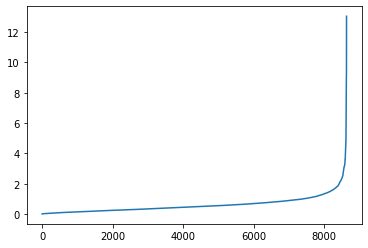

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [ ]:
dbscan3 = DBSCAN(eps=3, min_samples=min_samp)
dbscan3.fit(transformed_data)

DBSCAN(eps=3, min_samples=18)

In [ ]:
print(silhouette_score(transformed_data, dbscan3.labels_))

0.665828554992459


In [ ]:
dbscan4 = DBSCAN(eps=4, min_samples=min_samp)
dbscan4.fit(transformed_data)

DBSCAN(eps=4, min_samples=18)

In [ ]:
print(silhouette_score(transformed_data, dbscan4.labels_))

0.735488385092389


#####aanother trials

In [ ]:
dbscan5 = DBSCAN(eps=5, min_samples=min_samp)
dbscan5.fit(transformed_data)
print(silhouette_score(transformed_data, dbscan5.labels_))

0.7720177262323973


In [ ]:
dbscan6 = DBSCAN(eps=6, min_samples=min_samp)
dbscan6.fit(transformed_data)
print(silhouette_score(transformed_data, dbscan6.labels_))

0.794326029310858


In [ ]:
dbscan10 = DBSCAN(eps=10, min_samples=min_samp)
dbscan10.fit(transformed_data)
print(silhouette_score(transformed_data, dbscan10.labels_))

0.8456824683925604


##GMM

###Grid search

In [ ]:
parameters = { 'n_components':[1, 7]}
gm = GaussianMixture()
clf = GridSearchCV(gm, parameters)
clf.fit(transformed_data)

GridSearchCV(estimator=GaussianMixture(), param_grid={'n_components': [1, 7]})

In [ ]:
clf.best_params_

{'n_components': 7}

In [ ]:
gm = GaussianMixture(n_components=7)
gm.fit(transformed_data)

GaussianMixture(n_components=7)

In [ ]:
preds = gm.predict(transformed_data)
score = silhouette_score(transformed_data, preds)
print(score)

0.02664535314257607


### by maximizing silhouette_score

In [ ]:
scores = []
ks=[ x for x in range(3,13)] 
K = range(3,13)
for k in K:
    gmodel = GaussianMixture(n_components=k)
    gmodel.fit(transformed_data)
    scores.append(silhouette_score(transformed_data,gmodel.predict(transformed_data)))

In [ ]:
print(scores)

[0.1194577492809967, 0.07715268005656266, 0.06384518973481108, 0.0535374723432886, 0.005702232784128935, -0.0020657914983931666, -0.0025179554606737384, 0.0008025900539337524, 0.0077574003671038476, 0.012790299163324382]


In [ ]:
print(max(scores))
print(ks[scores.index(max(scores))])

0.1194577492809967
3


In [ ]:
gmodel3 = GaussianMixture(n_components=3)
gmodel3.fit(transformed_data)

GaussianMixture(n_components=3)

##silhouette score

In [ ]:
preds = kmeans.predict(transformed_data)
score = silhouette_score(transformed_data, preds)
print("silhouette score using kmeans is {}".format(score))

preds = gmodel3.predict(transformed_data)
score = silhouette_score(transformed_data, preds)
print("silhouette score using GaussianMixture is {}".format(score))


score = silhouette_score(transformed_data, ag8.labels_)
print("silhouette score using AgglomerativeClustering is {}".format(score))

score = silhouette_score(transformed_data, dbscan4.labels_)
print("silhouette score using dbscan is {}".format(score))

silhouette score using kmeans is 0.22627735035014748
silhouette score using GaussianMixture is 0.12849684371062198
silhouette score using AgglomerativeClustering is 0.20591773951354023
silhouette score using dbscan is 0.735488385092389
